<a href="https://colab.research.google.com/github/girijeshcse/car_finder/blob/ambika/notebooks/regions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.7.0'

In [2]:
import random
import os 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
from PIL import Image
import numpy as np

import tensorflow as tf
import os
import pandas as pd

random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
ls "/content/drive/MyDrive/Dataset/Car Images/"

'Test Images'/  'Train Images'/


In [5]:
dataset_loc="/content/drive/MyDrive/"
train_annotation = pd.read_csv(dataset_loc+"/Dataset/Annotations/Train Annotations.csv")
train_annotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8144 non-null   object
 1   Bounding Box coordinates  8144 non-null   int64 
 2   Unnamed: 2                8144 non-null   int64 
 3   Unnamed: 3                8144 non-null   int64 
 4   Unnamed: 4                8144 non-null   int64 
 5   Image class               8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


In [6]:
entry = train_annotation.loc[train_annotation['Image Name'] == '02256.jpg'].values[0]
#dim_analysis.loc[dim_analysis['dim3'] !=3 ]

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
entry[1]

9

In [9]:
train_annotation.rename(columns = {'Bounding Box coordinates':'x0', 'Unnamed: 2':'yo', 'Unnamed: 3':'x1', 'Unnamed: 4':'y1'}, inplace = True)
   

In [10]:
train_annotation.loc[train_annotation['Image Name'] == '00134.jpg']

,Image Name,x0,yo,x1,y1,Image class
133,00134.jpg,1,2,267,185,161


In [11]:
train_annotation

,Image Name,x0,yo,x1,y1,Image class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106
...,...,...,...,...,...,...
8139,08140.jpg,3,44,423,336,78
8140,08141.jpg,138,150,706,523,196
8141,08142.jpg,26,246,660,449,163
8142,08143.jpg,78,526,1489,908,112


In [12]:


train_images = pd.DataFrame(columns=['image','image_matrix','filename','car', 'x0', 'y0', 'x1', 'y1', 'label'])
dim_analysis = pd.DataFrame(columns=['filename', 'dim1', 'dim2', 'dim3'])


base=dataset_loc+"/Dataset/Car Images/Train Images"
newsize = (128, 128)
reshape_size = 128*128*3
size_dim=128


index = 0
#for dirs in range(1):
for dirs in os.listdir(base):
    full_dir=base+"/"+dirs
    
    if os.path.isfile(full_dir):
      continue
    for file in os.listdir(os.path.join(full_dir)):
      
      if os.path.isfile(os.path.join(full_dir, file)):
        filename=full_dir+"/"+file
        im = Image.open(filename, mode='r')
        dim_path=dirs+"/"+filename
        image_width = im.size[1]
        image_height = im.size[0]
        dim_analysis = dim_analysis.append({'filename': filename, 'dim1':image_height, 'dim2':image_width}, ignore_index = True)
  
            #print(im.size[0])
        im = im.resize(newsize)
        pix_val = np.array(list(im.getdata()))
        #print("\t \t", len(pix_val.shape))
        if ((len(pix_val.shape) >= 2) and (pix_val.shape[0]*pix_val.shape[1] == reshape_size)):
          bound_box = train_annotation.loc[train_annotation['Image Name'] == file].values[0]
          x0=bound_box[1]
          x0 = int((x0 / image_width) * size_dim) 

          y0=bound_box[2]
          y0 = int((y0 / image_height ) * size_dim)

          x1=bound_box[3]
          x1 = int((x1 / image_width)  * size_dim)

          y1=bound_box[4]
          y1 = int((y1 / image_height) * size_dim)
          train_images = train_images.append({'image': pix_val.reshape(reshape_size), 'image_matrix': pix_val, 'filename':full_dir+"/"+file, 'car':dirs, 'x0': x0, 'y0':y0, 'x1':x1, 'y1':y1, 'label':bound_box[5]}, ignore_index = True)
          


In [13]:
#train_images.to_csv('train_images.csv')

import pandas as pd



train_images = pd.DataFrame(columns=['image','image_matrix','filename','car', 'x0', 'y0', 'x1', 'y1', 'label'])


test_images = pd.DataFrame(columns=['image','image_matrix','filename','car', 'x0', 'y0', 'x1', 'y1', 'label'])
train_images = pd.read_csv ('train_images.csv')
print(train_images)
test_images = pd.read_csv ('test_images.csv')
print(test_images)

In [14]:
#test_images.read_csv('test_images.csv')

In [15]:
#test_images

In [16]:
train_images.info()
#train_images['image'] = pd.to_numeric(train_images['image'], downcast='float')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8126 entries, 0 to 8125
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image         8126 non-null   object
 1   image_matrix  8126 non-null   object
 2   filename      8126 non-null   object
 3   car           8126 non-null   object
 4   x0            8126 non-null   object
 5   y0            8126 non-null   object
 6   x1            8126 non-null   object
 7   y1            8126 non-null   object
 8   label         8126 non-null   object
dtypes: object(9)
memory usage: 571.5+ KB


In [17]:
dim_analysis.loc[0, 'filename']

'/content/drive/MyDrive//Dataset/Car Images/Train Images/Acura RL Sedan 2012/01034.jpg'

In [18]:
print("Various different dimensions of the image: \n ", np.unique(dim_analysis['dim1']))

Various different dimensions of the image: 
  [78 85 89 92 93 94 96 101 104 107 112 113 115 120 124 128 130 131 136 137
 140 142 144 148 150 152 159 160 166 172 175 188 192 196 198 200 201 203
 204 205 206 207 208 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 228 230 231 233 235 239 240 242 244 245 246 247 248 249
 250 251 254 255 256 257 259 260 261 262 263 264 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 296 297 300 301 305 306 307 308 309 310 311 314 316 317
 318 320 321 322 324 326 330 332 333 336 339 340 343 346 349 350 354 355
 358 360 361 363 365 370 372 374 375 376 377 380 385 386 388 390 392 396
 398 399 400 403 405 408 409 410 412 416 420 421 423 424 425 427 428 429
 430 432 433 434 437 438 440 441 444 445 446 447 448 449 450 451 453 454
 455 456 457 458 459 460 462 464 465 466 467 468 470 474 475 476 477 478
 479 480 482 483 484 485 486 489 490 494 495 496 497 500 502 504 505 506
 507

In [19]:
import seaborn as sns
print("Dimension Analysis:\n")
val_count = dim_analysis['dim2'].value_counts()
print(val_count)


Dimension Analysis:

480     1006
768      478
194      414
360      307
225      210
        ... 
2850       1
799        1
296        1
794        1
2048       1
Name: dim2, Length: 829, dtype: int64


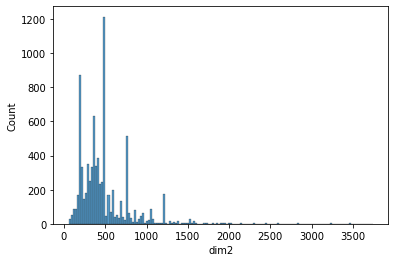

In [20]:

sns.histplot(dim_analysis['dim2'])

In [21]:
val_dict = dict(zip(train_images.car, train_images.label))

In [22]:
val_dict

{'AM General Hummer SUV 2000': 1,
 'Acura Integra Type R 2001': 6,
 'Acura RL Sedan 2012': 2,
 'Acura TL Sedan 2012': 3,
 'Acura TL Type-S 2008': 4,
 'Acura TSX Sedan 2012': 5,
 'Acura ZDX Hatchback 2012': 7,
 'Aston Martin V8 Vantage Convertible 2012': 8,
 'Aston Martin V8 Vantage Coupe 2012': 9,
 'Aston Martin Virage Convertible 2012': 10,
 'Aston Martin Virage Coupe 2012': 11,
 'Audi 100 Sedan 1994': 17,
 'Audi 100 Wagon 1994': 18,
 'Audi A5 Coupe 2012': 13,
 'Audi R8 Coupe 2012': 15,
 'Audi RS 4 Convertible 2008': 12,
 'Audi S4 Sedan 2007': 24,
 'Audi S4 Sedan 2012': 23,
 'Audi S5 Convertible 2012': 21,
 'Audi S5 Coupe 2012': 22,
 'Audi S6 Sedan 2011': 20,
 'Audi TT Hatchback 2011': 19,
 'Audi TT RS Coupe 2012': 25,
 'Audi TTS Coupe 2012': 14,
 'Audi V8 Sedan 1994': 16,
 'BMW 1 Series Convertible 2012': 27,
 'BMW 1 Series Coupe 2012': 28,
 'BMW 3 Series Sedan 2012': 29,
 'BMW 3 Series Wagon 2012': 30,
 'BMW 6 Series Convertible 2007': 31,
 'BMW ActiveHybrid 5 Sedan 2012': 26,
 'BMW

In [23]:

print("car counts:\n")
val_count = train_images['car'].value_counts()
print(val_count)

car counts:

GMC Savana Van 2012                                    68
Chrysler 300 SRT-8 2010                                49
Mercedes-Benz 300-Class Convertible 1993               48
Mitsubishi Lancer Sedan 2012                           48
Chevrolet Corvette ZR1 2012                            47
                                                       ..
Rolls-Royce Phantom Drophead Coupe Convertible 2012    31
Chevrolet Express Cargo Van 2007                       30
Maybach Landaulet Convertible 2012                     29
FIAT 500 Abarth 2012                                   28
Hyundai Accent Sedan 2012                              24
Name: car, Length: 196, dtype: int64


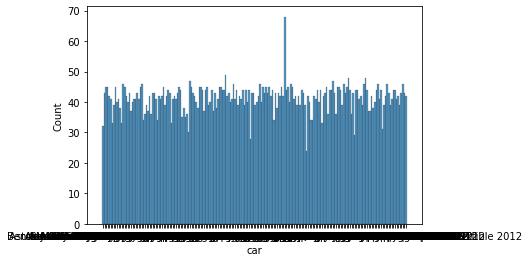

In [24]:
sns.histplot(train_images['car'])

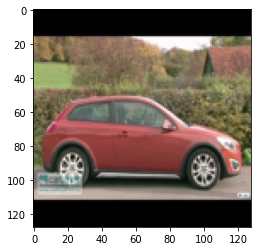

In [25]:
plt.imshow(im)
plt.show()

In [26]:
# few statistical analysis
train_images.loc[train_images['car'] == 'GMC Savana Van 2012']


,image,image_matrix,filename,car,x0,y0,x1,y1,label
4822,"[34, 36, 48, 55, 67, 95, 58, 71, 97, 75, 90, 1...","[[34, 36, 48], [55, 67, 95], [58, 71, 97], [75...",/content/drive/MyDrive//Dataset/Car Images/Tra...,GMC Savana Van 2012,12,17,170,79,119
4823,"[218, 214, 205, 215, 211, 202, 216, 212, 203, ...","[[218, 214, 205], [215, 211, 202], [216, 212, ...",/content/drive/MyDrive//Dataset/Car Images/Tra...,GMC Savana Van 2012,4,9,165,82,119
4824,"[93, 105, 118, 93, 105, 117, 93, 106, 115, 93,...","[[93, 105, 118], [93, 105, 117], [93, 106, 115...",/content/drive/MyDrive//Dataset/Car Images/Tra...,GMC Savana Van 2012,12,14,164,90,119
4825,"[254, 255, 255, 254, 255, 255, 254, 255, 255, ...","[[254, 255, 255], [254, 255, 255], [254, 255, ...",/content/drive/MyDrive//Dataset/Car Images/Tra...,GMC Savana Van 2012,15,31,149,81,119
4826,"[56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 5...","[[56, 56, 56], [56, 56, 56], [56, 56, 56], [57...",/content/drive/MyDrive//Dataset/Car Images/Tra...,GMC Savana Van 2012,25,10,167,77,119
...,...,...,...,...,...,...,...,...,...
4885,"[210, 210, 210, 209, 209, 209, 206, 206, 206, ...","[[210, 210, 210], [209, 209, 209], [206, 206, ...",/content/drive/MyDrive//Dataset/Car Images/Tra...,GMC Savana Van 2012,18,26,139,85,119
4886,"[240, 252, 254, 243, 253, 254, 253, 255, 255, ...","[[240, 252, 254], [243, 253, 254], [253, 255, ...",/content/drive/MyDrive//Dataset/Car Images/Tra...,GMC Savana Van 2012,22,13,148,89,119
4887,"[207, 215, 218, 211, 217, 220, 211, 218, 220, ...","[[207, 215, 218], [211, 217, 220], [211, 218, ...",/content/drive/MyDrive//Dataset/Car Images/Tra...,GMC Savana Van 2012,21,12,147,88,119
4888,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[[255, 255, 255], [255, 255, 255], [255, 255, ...",/content/drive/MyDrive//Dataset/Car Images/Tra...,GMC Savana Van 2012,8,8,163,88,119


In [27]:
len_train = train_images.shape[0]

 Acura RL Sedan 2012


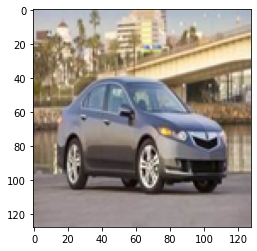

 Acura Integra Type R 2001


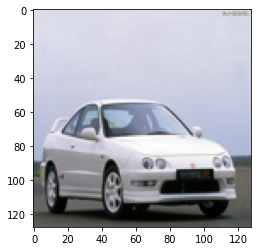

 Acura TL Type-S 2008


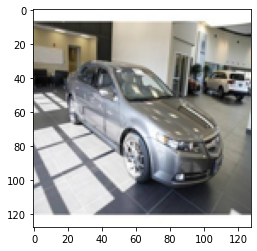

 Acura ZDX Hatchback 2012


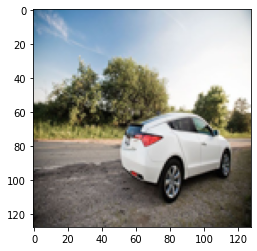

 Audi 100 Wagon 1994


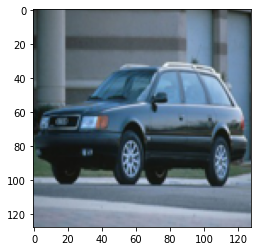

 Aston Martin Virage Convertible 2012


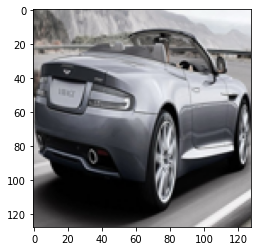

 Audi S4 Sedan 2007


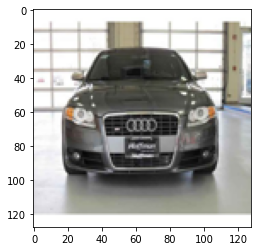

 Audi S5 Coupe 2012


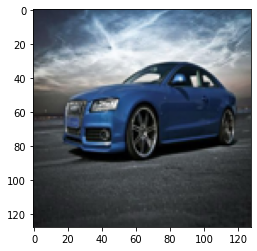

 Audi TT RS Coupe 2012


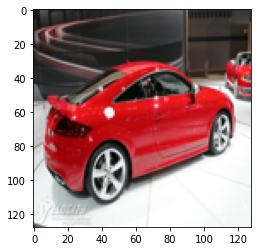

 Audi R8 Coupe 2012


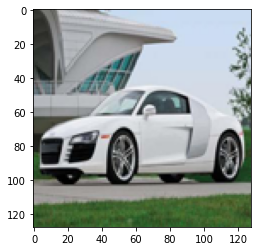

In [28]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Some random images
for i in range( 2, 1000, 100):
    print("=============\n", train_images.loc[i,'car'])
    plt.imshow(train_images.loc[i, 'image'].reshape(size_dim, size_dim, 3))
    plt.show()

In [29]:
dim_analysis

,filename,dim1,dim2,dim3
0,/content/drive/MyDrive//Dataset/Car Images/Tra...,960,347,NaN
1,/content/drive/MyDrive//Dataset/Car Images/Tra...,300,200,NaN
2,/content/drive/MyDrive//Dataset/Car Images/Tra...,300,164,NaN
3,/content/drive/MyDrive//Dataset/Car Images/Tra...,450,225,NaN
4,/content/drive/MyDrive//Dataset/Car Images/Tra...,800,528,NaN
...,...,...,...,...
8139,/content/drive/MyDrive//Dataset/Car Images/Tra...,640,427,NaN
8140,/content/drive/MyDrive//Dataset/Car Images/Tra...,455,303,NaN
8141,/content/drive/MyDrive//Dataset/Car Images/Tra...,470,265,NaN
8142,/content/drive/MyDrive//Dataset/Car Images/Tra...,500,331,NaN


In [30]:
def normalising_box(ind):
  test_img = train_images.loc[ind, 'filename']
  test_dim = dim_analysis.loc[dim_analysis['filename'] == test_img].values[0]
  image_width = test_dim[2]
  image_height = test_dim[1]
 
  IMAGE_SIZE=128
  x0=y_train[ind][0]
  y0=y_train[ind][1]

  x1=y_train[ind][2]
  y1=y_train[ind][3]

  print(x0, y0, x1, y1)
  
  x0 = int((x0 / image_width) * IMAGE_SIZE) # Scale the BBox
  y0 = int((y0 / image_height ) * IMAGE_SIZE)

  x1 = int((x1 / image_width)  * IMAGE_SIZE)
  y1 = int((y1 / image_height) * IMAGE_SIZE)
  print(x0, y0, x1, y1)
  #return x0, y0, x1, y1


In [31]:
train_images

,image,image_matrix,filename,car,x0,y0,x1,y1,label
0,"[135, 136, 140, 133, 133, 138, 132, 134, 134, ...","[[135, 136, 140], [133, 133, 138], [132, 134, ...",/content/drive/MyDrive//Dataset/Car Images/Tra...,Acura RL Sedan 2012,42,8,301,43,2
1,"[96, 73, 33, 100, 73, 34, 105, 73, 32, 112, 79...","[[96, 73, 33], [100, 73, 34], [105, 73, 32], [...",/content/drive/MyDrive//Dataset/Car Images/Tra...,Acura RL Sedan 2012,23,17,167,74,2
2,"[183, 186, 203, 181, 184, 201, 181, 184, 200, ...","[[183, 186, 203], [181, 184, 201], [181, 184, ...",/content/drive/MyDrive//Dataset/Car Images/Tra...,Acura RL Sedan 2012,26,22,210,59,2
3,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[[255, 255, 255], [255, 255, 255], [255, 255, ...",/content/drive/MyDrive//Dataset/Car Images/Tra...,Acura RL Sedan 2012,4,8,252,60,2
4,"[21, 31, 40, 31, 41, 49, 44, 52, 60, 36, 43, 4...","[[21, 31, 40], [31, 41, 49], [44, 52, 60], [36...",/content/drive/MyDrive//Dataset/Car Images/Tra...,Acura RL Sedan 2012,10,3,180,82,2
...,...,...,...,...,...,...,...,...,...
8121,"[2, 2, 2, 3, 2, 2, 4, 2, 2, 4, 3, 1, 4, 3, 1, ...","[[2, 2, 2], [3, 2, 2], [4, 2, 2], [4, 3, 1], [...",/content/drive/MyDrive//Dataset/Car Images/Tra...,Volvo C30 Hatchback 2012,19,22,122,65,193
8122,"[61, 48, 45, 57, 44, 41, 50, 40, 35, 45, 36, 3...","[[61, 48, 45], [57, 44, 41], [50, 40, 35], [45...",/content/drive/MyDrive//Dataset/Car Images/Tra...,Volvo C30 Hatchback 2012,19,10,177,76,193
8123,"[23, 36, 26, 41, 57, 40, 17, 28, 20, 9, 16, 8,...","[[23, 36, 26], [41, 57, 40], [17, 28, 20], [9,...",/content/drive/MyDrive//Dataset/Car Images/Tra...,Volvo C30 Hatchback 2012,10,14,217,64,193
8124,"[58, 16, 6, 52, 17, 1, 56, 19, 4, 53, 20, 3, 4...","[[58, 16, 6], [52, 17, 1], [56, 19, 4], [53, 2...",/content/drive/MyDrive//Dataset/Car Images/Tra...,Volvo C30 Hatchback 2012,16,17,184,73,193


In [32]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
#Extract the (flattened) data and class
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')


from tensorflow.keras.applications.mobilenet import preprocess_input
label_encoder = preprocessing.LabelEncoder()
#x_train = train_images['image_matrix']

x_train = np.zeros((len_train, size_dim, size_dim, 3))
y_train = np.zeros((len_train, 4))
y_train_class = x = np.asarray(train_images['label']).astype('float32')
#y_train_class = ohe.fit_transform(np.array(train_images['label'], int).reshape(-1, 1))
y_train_class = tf.one_hot(y_train_class,196)
#y_train = train_images[5:7]
for i in range(len(train_images)) :
  #x_val = np.asarray(train_images.loc[i,'image'], dtype=np.float64, order='C'
  x_train[i] = preprocess_input(np.array(train_images.loc[i,'image_matrix'].reshape(size_dim, size_dim, 3), dtype=np.float32))
  y_train[i] = train_images.loc[i, 'x0':'y1']

In [33]:
y_train_class[100]

<tf.Tensor: shape=(196,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [34]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def patch_fn (ind):
  
  
  # Create figure and axes
  fig,ax = plt.subplots(1)
  x0=y_train[ind][0]
  y0=y_train[ind][1]

  x1=y_train[ind][2]
  y1=y_train[ind][3]
  print("Normalised Bounding box: ", x0, y0, x1, y1)
  # Display the image
  ax.imshow(train_images.loc[ind,'image_matrix'].reshape(size_dim,size_dim,3))

  # Create a Rectangle patch
  rect = patches.Rectangle((x0, y0), x1 , y1, linewidth=2, edgecolor='r', facecolor='none')

  # Add the patch to the Axes
  ax.add_patch(rect)

  plt.show()



Normalised Bounding box:  21.0 11.0 197.0 63.0


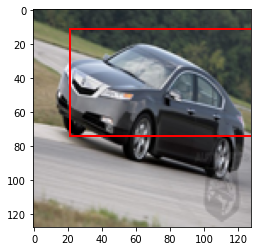

In [35]:
#Some random bounding box examples
patch_fn(50)


Normalised Bounding box:  12.0 11.0 163.0 86.0


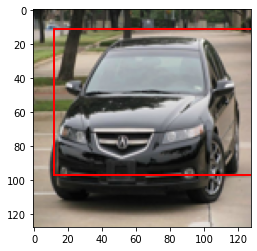

In [36]:
patch_fn(200)

Normalised Bounding box:  12.0 26.0 161.0 66.0


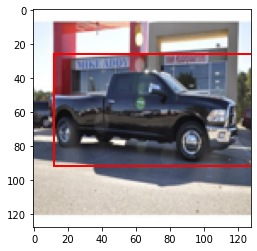

In [37]:
patch_fn(4000)

Normalised Bounding box:  22.0 9.0 169.0 65.0


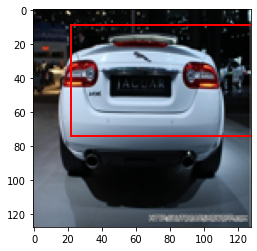

In [38]:
patch_fn(6123)

In [39]:
x_train.shape, y_train.shape, y_train_class.shape

((8126, 128, 128, 3), (8126, 4), TensorShape([8126, 196]))

In [40]:
x_train[25], y_train[25], y_train_class[25]

(array([[[-0.14509803, -0.26274508, -0.28627449],
         [-0.14509803, -0.26274508, -0.28627449],
         [-0.12156862, -0.23921567, -0.26274508],
         ...,
         [-0.14509803, -0.25490195, -0.33333331],
         [-0.34117645, -0.41960782, -0.50588238],
         [-0.41960782, -0.48235291, -0.54509807]],
 
        [[-0.12941176, -0.24705881, -0.27058822],
         [-0.11372548, -0.23137254, -0.25490195],
         [-0.09019607, -0.20784312, -0.23137254],
         ...,
         [-0.24705881, -0.372549  , -0.42745095],
         [-0.31764704, -0.41960782, -0.45098037],
         [-0.41176468, -0.49803919, -0.51372552]],
 
        [[-0.13725489, -0.25490195, -0.27843136],
         [-0.09019607, -0.20784312, -0.23137254],
         [-0.09019607, -0.20784312, -0.23137254],
         ...,
         [-0.19215685, -0.32549018, -0.39607841],
         [-0.17647058, -0.30196077, -0.34901959],
         [-0.40392154, -0.50588238, -0.53725493]],
 
        ...,
 
        [[ 0.42745101,  0.33333337

In [41]:
del train_images, dim_analysis, train_annotation
import gc
gc.collect()

2663

Considering VGG16 to do object detection region and if needed SVM on the flatten layer to detect the class(196 class)

In [42]:
x_train.shape, y_train.shape

((8126, 128, 128, 3), (8126, 4))

In [43]:
y_train

array([[ 42.,   8., 301.,  43.],
       [ 23.,  17., 167.,  74.],
       [ 26.,  22., 210.,  59.],
       ...,
       [ 10.,  14., 217.,  64.],
       [ 16.,  17., 184.,  73.],
       [  5.,  37., 163.,  78.]])

In [44]:
dataset_loc="/content/drive/MyDrive/"
test_annotation = pd.read_csv(dataset_loc+"/Dataset/Annotations/Test Annotation.csv")
test_annotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8041 non-null   object
 1   Bounding Box coordinates  8041 non-null   int64 
 2   Unnamed: 2                8041 non-null   int64 
 3   Unnamed: 3                8041 non-null   int64 
 4   Unnamed: 4                8041 non-null   int64 
 5   Image class               8041 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.0+ KB


In [45]:
test_annotation.rename(columns = {'Bounding Box coordinates':'x0', 'Unnamed: 2':'yo', 'Unnamed: 3':'x1', 'Unnamed: 4':'y1'}, inplace = True)
   

In [46]:
#TEst images




test_images = pd.DataFrame(columns=['image','image_matrix','filename','car', 'x0', 'y0', 'x1', 'y1', 'label'])
dim_analysis_test = pd.DataFrame(columns=['filename', 'dim1', 'dim2', 'dim3'])


base=dataset_loc+"/Dataset/Car Images/Test Images"
newsize = (128, 128)
reshape_size = 128*128*3
size_dim=128


index = 0
for dirs in os.listdir(base):
    full_dir=base+"/"+dirs
    
    if os.path.isfile(full_dir):
      continue
    for file in os.listdir(os.path.join(full_dir)):
      
      if os.path.isfile(os.path.join(full_dir, file)):
        filename=full_dir+"/"+file
        im = Image.open(filename, mode='r')
        dim_path=dirs+"/"+filename
        image_width = im.size[1]
        image_height = im.size[0]
        dim_analysis_test = dim_analysis_test.append({'filename': filename, 'dim1':image_height, 'dim2':image_width}, ignore_index = True)

        im = im.resize(newsize)
        pix_val = np.array(list(im.getdata()))
        if ((len(pix_val.shape) >= 2) and (pix_val.shape[0]*pix_val.shape[1] == reshape_size)):
          bound_box = test_annotation.loc[test_annotation['Image Name'] == file].values[0]
          x0=bound_box[1]
          x0 = int((x0 / image_width) * size_dim) 

          y0=bound_box[2]
          y0 = int((y0 / image_height ) * size_dim)

          x1=bound_box[3]
          x1 = int((x1 / image_width)  * size_dim)

          y1=bound_box[4]
          y1 = int((y1 / image_height) * size_dim)
          test_images = test_images.append({'image': pix_val.reshape(reshape_size), 'image_matrix': pix_val, 'filename':full_dir+"/"+file, 'car':dirs, 'x0': x0, 'y0':y0, 'x1':x1, 'y1':y1, 'label':bound_box[5]}, ignore_index = True)
          


In [47]:
test_images.to_csv('test_images.csv')

In [48]:
test_images

,image,image_matrix,filename,car,x0,y0,x1,y1,label
0,"[95, 95, 97, 94, 95, 97, 95, 96, 98, 95, 96, 9...","[[95, 95, 97], [94, 95, 97], [95, 96, 98], [95...",/content/drive/MyDrive//Dataset/Car Images/Tes...,Acura Integra Type R 2001,7,11,216,71,6
1,"[205, 206, 208, 214, 215, 217, 234, 235, 237, ...","[[205, 206, 208], [214, 215, 217], [234, 235, ...",/content/drive/MyDrive//Dataset/Car Images/Tes...,Acura Integra Type R 2001,8,52,77,141,6
2,"[77, 97, 68, 54, 77, 30, 53, 75, 23, 67, 84, 4...","[[77, 97, 68], [54, 77, 30], [53, 75, 23], [67...",/content/drive/MyDrive//Dataset/Car Images/Tes...,Acura Integra Type R 2001,26,21,158,64,6
3,"[71, 95, 50, 69, 97, 51, 69, 97, 52, 61, 83, 4...","[[71, 95, 50], [69, 97, 51], [69, 97, 52], [61...",/content/drive/MyDrive//Dataset/Car Images/Tes...,Acura Integra Type R 2001,30,34,155,72,6
4,"[253, 253, 253, 253, 253, 253, 253, 253, 253, ...","[[253, 253, 253], [253, 253, 253], [253, 253, ...",/content/drive/MyDrive//Dataset/Car Images/Tes...,Acura Integra Type R 2001,5,0,183,81,6
...,...,...,...,...,...,...,...,...,...
8020,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[[255, 255, 255], [255, 255, 255], [255, 255, ...",/content/drive/MyDrive//Dataset/Car Images/Tes...,Toyota Sequoia SUV 2012,48,26,123,74,186
8021,"[166, 171, 174, 175, 180, 183, 183, 188, 191, ...","[[166, 171, 174], [175, 180, 183], [183, 188, ...",/content/drive/MyDrive//Dataset/Car Images/Tes...,Toyota Sequoia SUV 2012,3,2,165,84,186
8022,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[[255, 255, 255], [255, 255, 255], [255, 255, ...",/content/drive/MyDrive//Dataset/Car Images/Tes...,Toyota Sequoia SUV 2012,6,14,163,81,186
8023,"[153, 158, 164, 153, 158, 164, 153, 158, 164, ...","[[153, 158, 164], [153, 158, 164], [153, 158, ...",/content/drive/MyDrive//Dataset/Car Images/Tes...,Toyota Sequoia SUV 2012,12,29,158,78,186


Dimension Analysis:

640     1320
1024     690
300      466
259      434
500      363
        ... 
547        1
966        1
551        1
385        1
1498       1
Name: dim1, Length: 645, dtype: int64


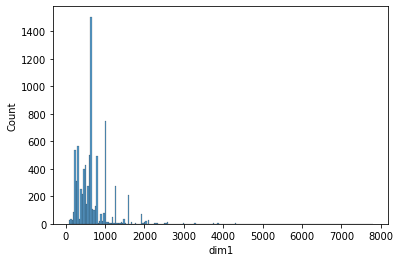

In [49]:
import seaborn as sns
print("Dimension Analysis:\n")
val_count = dim_analysis_test['dim1'].value_counts()
print(val_count)

sns.histplot(dim_analysis_test['dim1'])

 Acura Integra Type R 2001


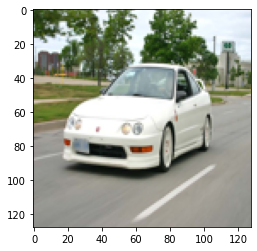

 Acura TL Sedan 2012


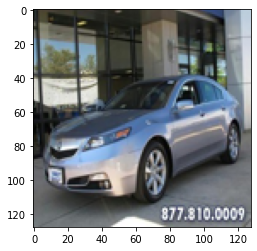

 Acura ZDX Hatchback 2012


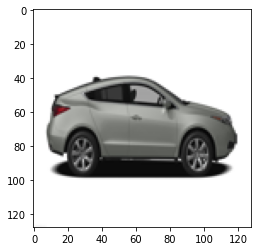

 Aston Martin V8 Vantage Convertible 2012


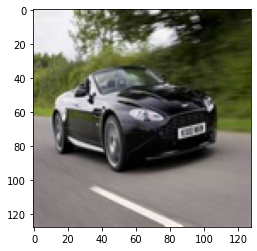

 Audi 100 Sedan 1994


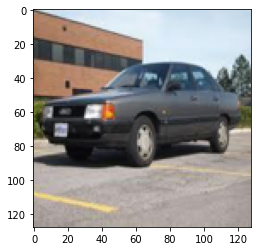

 Aston Martin Virage Coupe 2012


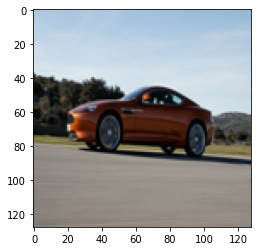

 Audi S4 Sedan 2007


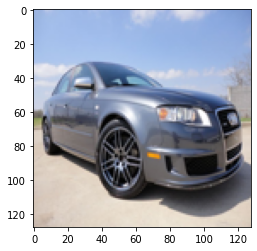

 Audi S5 Convertible 2012


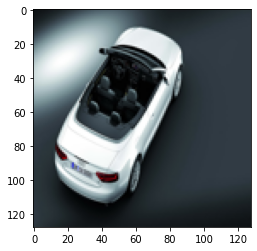

 Audi S5 Coupe 2012


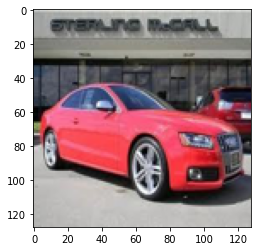

 Audi TTS Coupe 2012


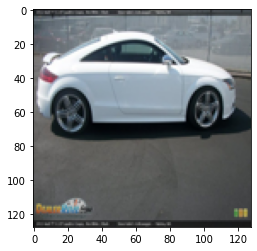

In [50]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Some random images
for i in range( 2, 1000, 100):
    print("=============\n", test_images.loc[i,'car'])
    plt.imshow(test_images.loc[i, 'image'].reshape(size_dim, size_dim, 3))
    plt.show()

In [51]:
len_test = test_images.shape[0]

In [52]:
import matplotlib.pyplot as plt
#Extract the (flattened) data and class

from tensorflow.keras.applications.mobilenet import preprocess_input


x_test = np.zeros((len_test, size_dim, size_dim, 3))
y_test = np.zeros((len_test, 4))

y_test_class = np.asarray(test_images['label']).astype('float32')
#y_train_class = ohe.fit_transform(np.array(train_images['label'], int).reshape(-1, 1))
y_test_class = tf.one_hot(y_test_class,196)
#y_train = train_images[5:7]
for i in range(len(test_images)) :
  x_test[i] = preprocess_input(np.array(test_images.loc[i,'image_matrix'].reshape(size_dim, size_dim, 3), dtype=np.float32))
  y_test[i] = test_images.loc[i, 'x0':'y1']
  

In [53]:
y_test_class

<tf.Tensor: shape=(8025, 196), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [54]:
x_train.shape, y_train.shape

((8126, 128, 128, 3), (8126, 4))

In [55]:
x_test.shape, y_test.shape

((8025, 128, 128, 3), (8025, 4))

In [56]:
del test_images, dim_analysis_test, test_annotation

In [72]:
import gc
gc.collect()

88

In [58]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2



from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape
IMAGE_SIZE=128


In [59]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape

ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower


model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA) # Load pre-trained mobilenet
for layer in model.layers:
    layer.trainable = True

   

In [60]:
# Add new top layer which is a conv layer of the same size as the previous layer so that only 4 coords of BBox can be output
x0 = model.layers[-1].output
x1 = Conv2D(4, kernel_size=4, name="coords")(x0)
x2 = Reshape((4,))(x1)
model_region = Model(inputs=model.input, outputs=x2)
model_region.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                      

In [61]:
model_region.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                      

In [62]:
def IOU(y_true, y_pred):
    intersections = 0
    unions = 0
    # set the types so we are sure what type we are using

    gt = y_true
    pred = y_pred
    # Compute interection of predicted (pred) and ground truth (gt) bounding boxes
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

    # Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
      if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
        intersections += intersection[j]
        unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()), 4)
    # This must match the type used in py_func
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tensorflow.py_function(IOU, [y_true, y_pred], Tout=tensorflow.float32)
    return iou


In [63]:
model_region.compile(loss="mean_squared_error", optimizer="adam", metrics=[IoU]) # Regression loss is MSE



In [64]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='IoU', patience=10, min_delta=0.001)

# Fit the model
model_region.fit(x_train, y_train,validation_data =(x_test, y_test), epochs=200, batch_size=32)
#, callbacks=[callback])
#, callbacks=[callback])
#, validation_data=(X_val, y_val)

Epoch 1/200
254/254 [==============================] - 71s 230ms/step - loss: 235.2820 - IoU: 0.7555 - val_loss: 283.5302 - val_IoU: 0.7210
Epoch 2/200
254/254 [==============================] - 54s 212ms/step - loss: 63.4393 - IoU: 0.8187 - val_loss: 86.5719 - val_IoU: 0.8020
Epoch 3/200
254/254 [==============================] - 54s 212ms/step - loss: 45.0856 - IoU: 0.8404 - val_loss: 79.2361 - val_IoU: 0.8114
Epoch 4/200
254/254 [==============================] - 54s 213ms/step - loss: 38.9491 - IoU: 0.8513 - val_loss: 85.2916 - val_IoU: 0.8242
Epoch 5/200
254/254 [==============================] - 54s 211ms/step - loss: 30.6822 - IoU: 0.8592 - val_loss: 62.5673 - val_IoU: 0.8279
Epoch 6/200
254/254 [==============================] - 54s 212ms/step - loss: 32.9729 - IoU: 0.8597 - val_loss: 53.4121 - val_IoU: 0.8420
Epoch 7/200
254/254 [==============================] - 54s 213ms/step - loss: 27.8106 - IoU: 0.8747 - val_loss: 52.3023 - val_IoU: 0.8489
Epoch 8/200
254/254 [===========

KeyboardInterrupt: ignored

In [64]:
model_region.fit(x_train, y_train,validation_data =(x_test, y_test), epochs=200, batch_size=32, callbacks=[callback])

Epoch 1/200
254/254 [==============================] - 54s 212ms/step - loss: 18.2957 - IoU: 0.8927 - val_loss: 54.3444 - val_IoU: 0.8369
Epoch 2/200
254/254 [==============================] - 51s 202ms/step - loss: 19.1175 - IoU: 0.8905 - val_loss: 43.5289 - val_IoU: 0.8629
Epoch 3/200
254/254 [==============================] - 51s 203ms/step - loss: 16.5400 - IoU: 0.8958 - val_loss: 63.4434 - val_IoU: 0.8412
Epoch 4/200
254/254 [==============================] - 52s 203ms/step - loss: 14.7345 - IoU: 0.9025 - val_loss: 44.6283 - val_IoU: 0.8637
Epoch 5/200
254/254 [==============================] - 51s 203ms/step - loss: 15.0609 - IoU: 0.8996 - val_loss: 48.2507 - val_IoU: 0.8600
Epoch 6/200
254/254 [==============================] - 51s 203ms/step - loss: 15.2794 - IoU: 0.8994 - val_loss: 49.4855 - val_IoU: 0.8520
Epoch 7/200
254/254 [==============================] - 51s 201ms/step - loss: 14.4548 - IoU: 0.9009 - val_loss: 51.0639 - val_IoU: 0.8550
Epoch 8/200
254/254 [=============

In [65]:
model_region.evaluate(x_train, y_train)

254/254 [==============================] - 23s 90ms/step - loss: 1.0398 - IoU: 0.9734


[1.0397515296936035, 0.9734300374984741]

In [66]:
model_region.evaluate(x_test, y_test)

251/251 [==============================] - 23s 91ms/step - loss: 44.9292 - IoU: 0.8767


[44.929195404052734, 0.8767294883728027]

In [ ]:
x_train[0].shape

In [73]:
model_region.predict(x_test[0].reshape(1, 128, 128, 3))

array([[  8.708769,  12.357573, 202.57166 ,  71.0549  ]], dtype=float32)

In [74]:
y_test[0]

array([  7.,  11., 216.,  71.])

In [75]:
model_region.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                      

In [ ]:
from tensorflow.keras.utils import to_categorical

#y_train_class=to_categorical(y_train_class)

#y_test_class=to_categorical(y_test_class)

In [ ]:
y_test_class[250]

In [ ]:
y_train_class.shape, y_test_class.shape

In [ ]:
base_model_resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(128,128,3),classes=y_train_class.shape[1])
#base_model_vgg16 = VGG16(include_top=False,weights='imagenet',input_shape=(128,128,3),classes=y_train_class.shape[1])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization, Dense
for layer in base_model_resnet.layers:
  layer.trainable = False

#Defining and Adding layers
model_class=Sequential()
#Add the Dense layers along with activation and batch normalization
model_class.add(base_model_resnet)
model_class.add(Flatten())

model_class.summary()



In [ ]:

#Add the Dense layers along with activation and batch normalization
model_class.add(Dense(2000,activation=('relu'),input_dim=8192))
model_class.add(Dense(1000,activation=('relu'))) 
model_class.add(Dropout(.4))
model_class.add(Dense(500,activation=('relu'))) 
model_class.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_class.add(Dense(250,activation=('relu')))
model_class.add(Dropout(.2))
model_class.add(Dense(196,activation=('softmax'))) #This is the classification layer

#Model summary

In [ ]:
model_class.summary()

In [ ]:
#Defining the parameters

from tensorflow.keras.optimizers import SGD

from tensorflow.keras.optimizers import RMSprop
batch_size= 100
epochs=30
learn_rate=.01

sgd=SGD(lr=learn_rate,momentum=.01,nesterov=False)


opt = RMSprop(learning_rate=18, momentum=.01)
#Compile
model_class.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Training
#model_class.fit(x_train, y_train_class,validation_data =(x_test, y_test_class), epochs=100, batch_size=32)
#model_class.fit(x_test, y_test_class, epochs=100, batch_size=32)

In [ ]:
model_class.fit(x_train, y_train_class, epochs=100, batch_size=32)

#model_class.fit(x_train, y_train_class,validation_data =(x_test, y_test_class), epochs=100, batch_size=32)

In [ ]:
model_class.fit(x_train, y_train_class,validation_data =(x_test, y_test_class), epochs=200, batch_size=32)

In [ ]:
model_class.fit(x_train, y_train_class,validation_data =(x_test, y_test_class), epochs=200, batch_size=32)

In [ ]:
model_class.evaluate(x_train, y_train_class)

In [ ]:
model_class.evaluate(x_test, y_test_class)

In [ ]:
model_class.predict(x_train[10].reshape(1, 128, 128, 3))

In [ ]:
y_train_class[10]